In [1]:
# <MovieLens 데이터셋의 기본 정보 구하기>

# -*- coding: utf-8 -*-
%matplotlib inline

import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Source : https://grouplens.org/datasets/movielens

rating_file_path = "../data/ml-1m/ratings.dat"
movie_file_path = "../data/ml-1m/movies.dat"
user_file_path = "../data/ml-1m/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names = ['user_id','movie_id','rating','time'],
                                    delimiter = '::')
movie_data = pd.io.parsers.read_csv(movie_file_path,
                                   names = ['movie_id','title','genre'],
                                   delimiter = '::')
user_data = pd.io.parsers.read_csv(user_file_path,
                                  names = ['user_id','gender','age','occupation','zipcode'],
                                  delimiter = '::')

rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# <분석할 영화의 정보 탐색하기>

# 총 영화의 개수를 출력합니다.
print("total number of movie in data :", len(movie_data["title"].unique()))

# 연도별 영화 개수가 많은 Top 10 연도를 출력합니다.
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head(10)

total number of movie in data : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [5]:
# <미니 퀴즈 3-3 : 영화의 연대별 개수 탐색>

movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+"0")
moview_year_term = movie_data['year_term'].value_counts().sort_index()
print(moview_year_term)

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year_term, dtype: int64


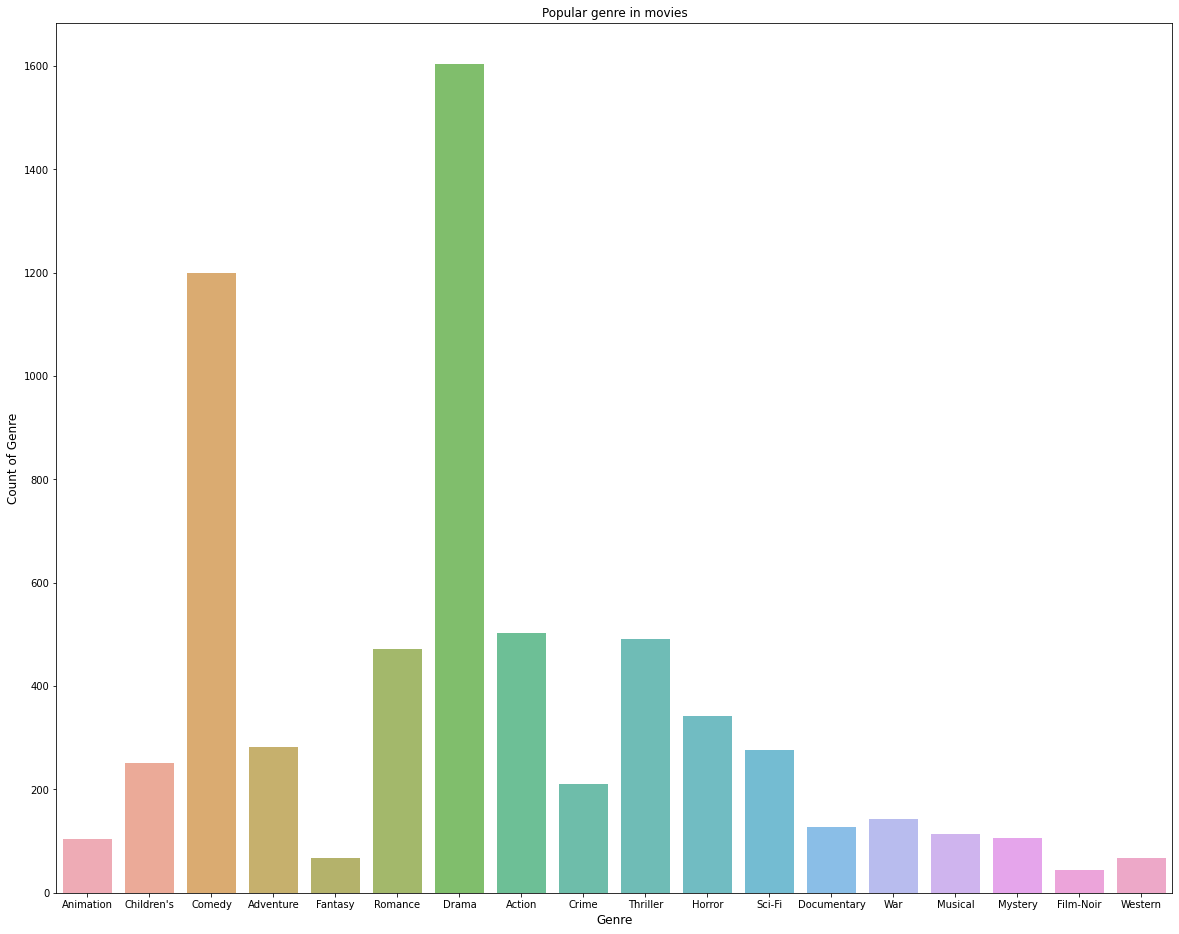

In [6]:
# <장르의 속성 탐색하기>

# 가장 많이 등장한 장르의 속성을 추출합니다. (예시: Drama)
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    
    # genre 피처를 '|' 구분자로 분리합니다.
    genre_combination = row['genre']
    parsed_genre = genre_combination.split("|")
    
    # 구분자로 분리한 장르의 속성을 unique_qenre_dict에 각각 계산하여 저장합니다.
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
# unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha = 0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.show()

In [7]:
# <분석할 유저의 정보 탐색하기>

# 유저의 수를 탐색합니다.
print("total number of user in data :",len(user_data['user_id'].unique()))

total number of user in data : 6040


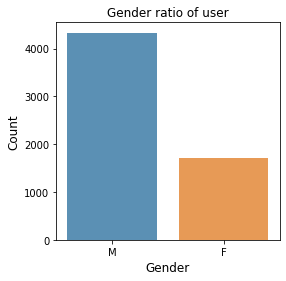

In [8]:
# 유저의 성별을 탐색합니다.
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = user_data['gender'].value_counts()
sns.barplot(user_gender.index, user_gender.values, alpha=0.8)
plt.title('Gender ratio of user')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

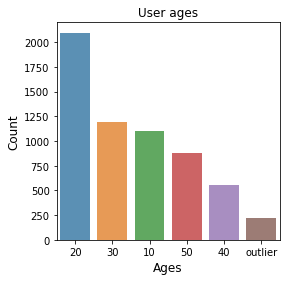

In [9]:
# 유저의 연령대를 탐색합니다.
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"

user_data['ages'] = user_data['age'].apply(lambda x: age_classification(x))
user_ages = user_data['ages'].value_counts()

sns.barplot(user_ages.index, user_ages.values, alpha=0.8)
plt.title('User ages')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

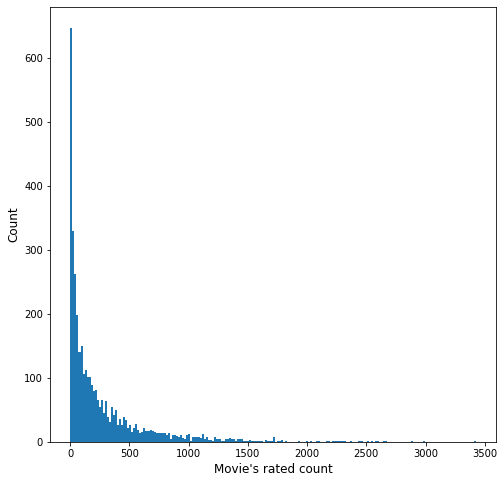

total number of movie in data : 3883
total number of movie rated below 100 : 1687


In [10]:
# <평점 데이터의 정보 탐색하기>

# 각 영화가 평가받은 횟수를 탐색합니다.
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_rate_count, bins = 200)
plt.ylabel('Count', fontsize = 12)
plt.xlabel("Movie's rated count", fontsize = 12)
plt.show()

print("total number of movie in data :", len(movie_data['movie_id'].unique()))
print("total number of movie rated below 100 :", len(movie_rate_count[movie_rate_count < 100]))

<AxesSubplot:>

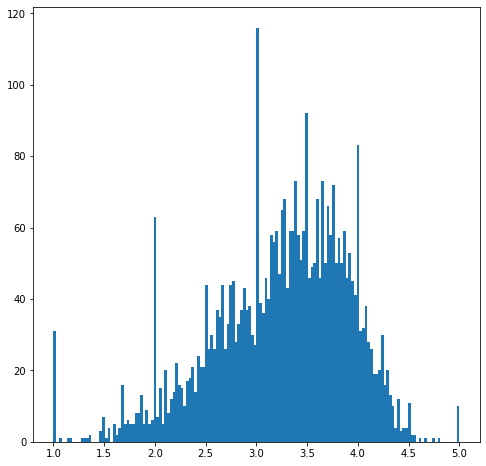

In [11]:
# 영화별 평균 평점을 탐색합니다.
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info['rating_mean'].hist(bins = 150, grid = False)

<AxesSubplot:>

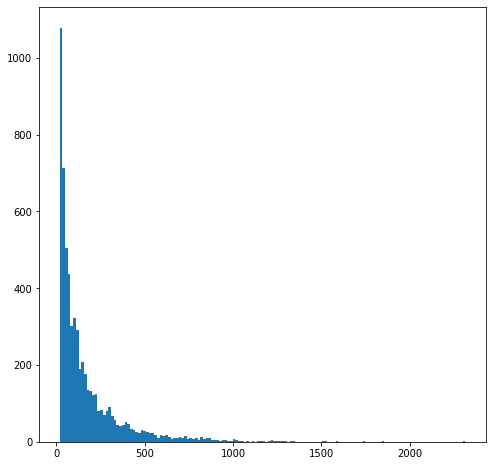

In [12]:
# <미니퀴즈 3-5>
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean', 'std'])
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']

# 유저별로 평가한 영화 개수
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)

<AxesSubplot:>

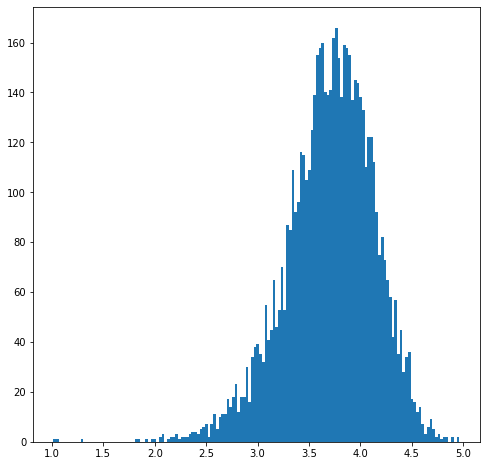

In [13]:
# 유저별로 평가한 평균 영화 점수
user_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

<AxesSubplot:>

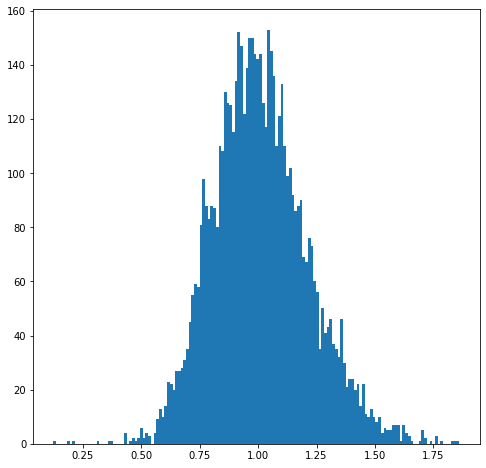

In [14]:
# 유저별로 평가한 영화 점수의 편차
user_grouped_rating_info['rating_std'].hist(bins=150, grid=False)

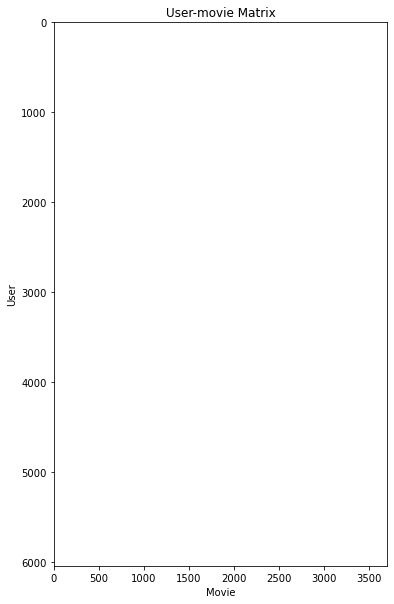

In [27]:
# <user-movie 형태의 표로 살펴보기>

# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성합니다.
rating_table = rating_data[['user_id','movie_id','rating']].set_index(["user_id","movie_id"]).unstack()

# user_movie 표를 시각화합니다.
plt.rcParams['figure.figsize'] = [10,10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

In [15]:
# <MovieLens 데이터에 SVD 적용하기>

from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다.
reader = Reader(rating_scale = (1, 5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다.
train_start = time.time()
model = SVD(n_factors = 8, 
            lr_all = 0.005, 
            reg_all = 0.02, 
            n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 51.66 seconds


In [16]:
# <영화의 점수를 예측할 타겟 유저 선정하기>

# user_id가 4인 유저의 영화 평가 데이터입니다.
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [17]:
# user_id 4인 유저가 평가한 영화 히스토리 정보를 추출합니다.
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [20]:
# <타겟 유저가 보지 않은 영화 중, 예상 평점이 높은 10개 선정>

# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))
    
# 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                           user_id = target_user_id,
                                                           user_history = target_user_movie_rating_dict)

# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                    key = operator.itemgetter(1), reverse = True)[:10]
target_user_top10_predicted

[(106, 5),
 (111, 5),
 (175, 5),
 (213, 5),
 (246, 5),
 (326, 5),
 (527, 5),
 (608, 5),
 (615, 5),
 (668, 5)]

In [21]:
# 타이틀 정보로 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장합니다.
movie_dict = {}
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

# 앞서 계산한 Top 10 영화에 movie_title을 매핑하여 출력합니다.
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

Nobody Loves Me (Keiner liebt mich) (1994) : 5
Taxi Driver (1976) : 5
Kids (1995) : 5
Burnt By the Sun (Utomlyonnye solntsem) (1994) : 5
Hoop Dreams (1994) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Fargo (1996) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Pather Panchali (1955) : 5


In [23]:
# <예측 모델의 평가 방법>

# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성합니다. 학습 데이터와 테스트 데이터를 8:2로 분할합니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data, test_data = train_test_split(data, test_size = 0.2)

# SVD 모델을 학습힙니다.
train_start = time.time()
model = SVD(n_factors = 8,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)
model.fit(train_data)

train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력합니다.
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 51.28 seconds
RMSE of test dataset in SVD model:
RMSE: 0.8593


0.8592588981795123

In [29]:
# <실제 평점과의 비교 시각화하기: 평점 예측 단계>

# 타겟 유저 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))
    
# 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
            
# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                           user_id = target_user_id,
                                                           user_history = target_user_movie_rating_dict)
target_user_movie_predict_dict

{260: 4.38984714492619,
 480: 3.6142205151911337,
 1036: 4.025138687792726,
 1097: 4.178781906557515,
 1196: 4.123253639478724,
 1198: 4.492971391725857,
 1201: 4.302157027942262,
 1210: 3.7083498289652854,
 1214: 4.238916928164293,
 1240: 4.201238035734172,
 1387: 4.099373032744914,
 1954: 3.8968919225918848,
 2028: 4.2949239592804185,
 2366: 4.1758792215149345,
 2692: 4.304868782379974,
 2947: 4.0967067263909875,
 2951: 3.9905356976053885,
 3418: 4.0474168208390875,
 3468: 4.573686747531101,
 3527: 3.3695548853077684,
 3702: 3.846709087197503}

In [31]:
# <실제 평점과의 비교 시각화하기>

# 예측 점수와 실제 점수를 영화 타이틀에 매핑합니다.
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0
for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating, 2)
    origin_rating = target_user_movie_rating_dict[movie_id]
    movie_title = movie_dict[movie_id]
    print("movie", str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.39
movie 2 : Jurassic Park (1993) - 4 / 3.61
movie 3 : Die Hard (1988) - 4 / 4.03
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.18
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 4.12
movie 6 : Raiders of the Lost Ark (1981) - 5 / 4.49
movie 7 : Good, The Bad and The Ugly, The (1966) - 5 / 4.3
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 3.71
movie 9 : Alien (1979) - 4 / 4.24
movie 10 : Terminator, The (1984) - 5 / 4.2
movie 11 : Jaws (1975) - 5 / 4.1
movie 12 : Rocky (1976) - 5 / 3.9
movie 13 : Saving Private Ryan (1998) - 5 / 4.29
movie 14 : King Kong (1933) - 4 / 4.18
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / 4.3
movie 16 : Goldfinger (1964) - 5 / 4.1
movie 17 : Fistful of Dollars, A (1964) - 4 / 3.99
movie 18 : Thelma & Louise (1991) - 4 / 4.05
movie 19 : Hustler, The (1961) - 5 / 4.57
movie 20 : Predator (1987) - 1 / 3.37
movie 21 : Mad Max (1979) - 4 / 3.85


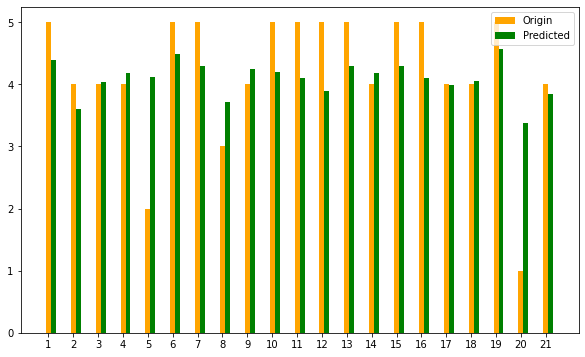

In [33]:
# <실제 평점과의 비교 시각화하기>

# 실제 점수와 예측 점수를 리스트로 추출합니다.
origin = origin_rating_list
predicted = predicted_rating_list

# 영화의 개수만큼 막대 그래프의 index 개수를 생성합니다.
plt.rcParams['figure.figsize'] = (10, 6)
index = np.arange(len(movie_title_list))
bar_width = 0.2

# 실제 점수와 예측 점수를 bar 그래프로 출력합니다.
rects1 = plt.bar(index, origin, bar_width,
                color = 'orange',
                label = 'Origin')
rects2 = plt.bar(index + bar_width, predicted, bar_width,
                color = 'green',
                label = 'Predicted')
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()